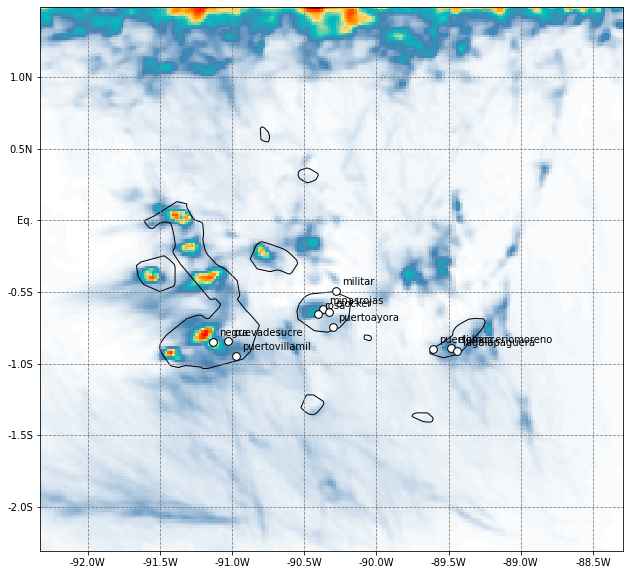

In [184]:
import matplotlib.pyplot as plt
import darwin
from importlib import reload
reload(darwin)

files = darwin.glob_measurements()
ls_prcp = darwin.open_experiment(experiment = 'rc_trop_ls', variable = 'prcp', year = '2022')
fig, ax = plt.subplots(figsize=(12,10))
ls_prcp.plot_map(ax=ax)
plt.show()

<salem.Grid>
  proj: +datum=WGS84 +ellps=WGS84 +k=1 +lat_0=2.0 +lon_0=-90.31006622 +no_defs+proj=merc +units=m +x_0=0.0 +y_0=0.0
  pixel_ref: center
  origin: lower-left
  (nx, ny): (500, 466)
  (dx, dy): (900.0, 900.0)
  (x0, y0): (-224550.0, -254551.375)

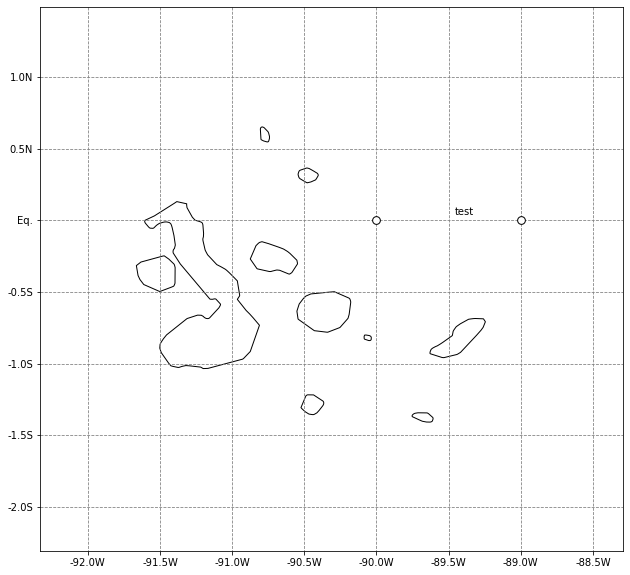

In [178]:
from shapely.geometry import Point
base_map = ls_prcp.wrf_product.prcp.salem.get_map()
fig, ax = plt.subplots(figsize=(12,10))
# base_map.set_data(ls_prcp.wrf_product.prcp.mean(dim='time', skipna=True, keep_attrs=True))
(lon, lat) = base_map.grid.transform(0., -91., crs=ls_prcp.wrf_product.prcp.attrs['pyproj_srs'])
base_map.set_points([-90, -89], [0, 0], text='test')
base_map.plot(ax=ax)
base_map.grid

In [29]:
ls_prcp.wrf_product['prcp'].attrs['pyproj_srs']

'+proj=merc +lat_0=2.0 +lon_0=-90.31006622 +k=1 +x_0=0.0 +y_0=0.0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [138]:
'+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

path="/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv"

ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()

In [51]:
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [67]:
files = glob("/home/ben/data/darwin_measured/??_AWS*/*[!xlsx_complete]")
files = [file for file in files if not file.count("xlsx") and not file.count("_-_")]

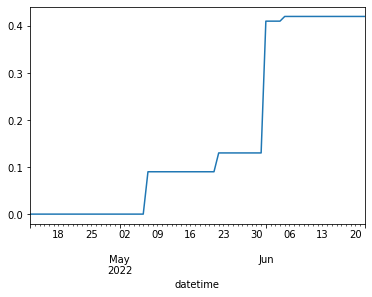

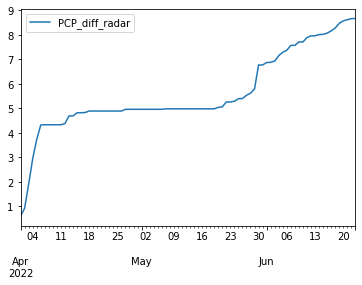

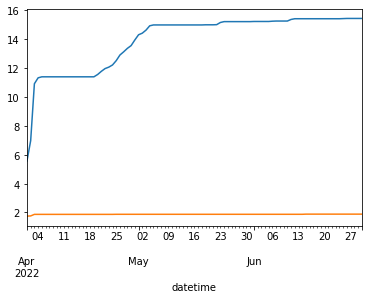

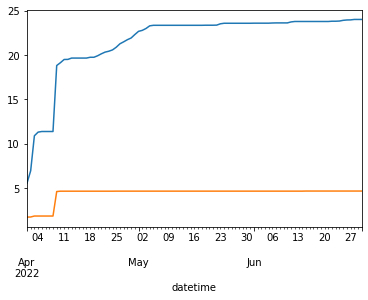

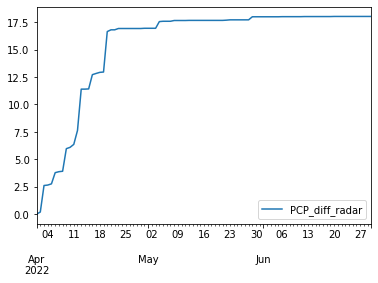

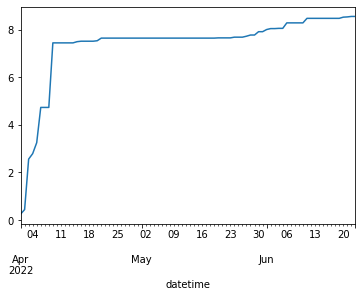

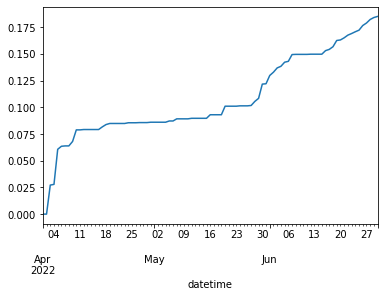

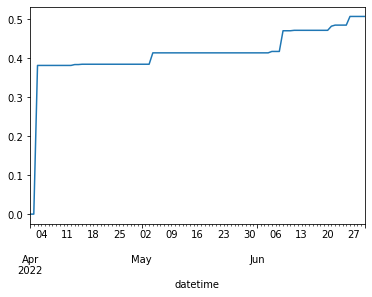

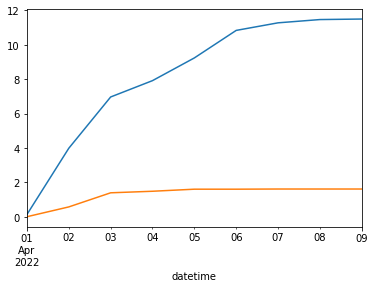

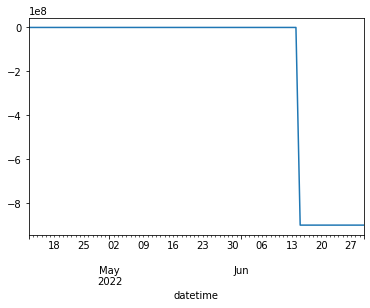

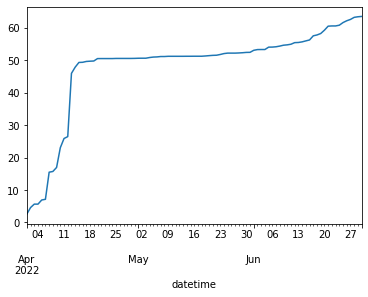

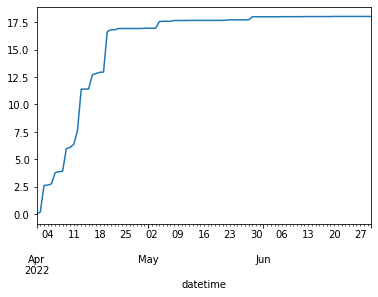

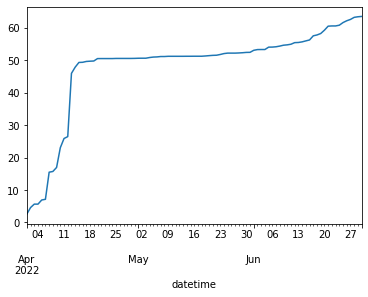

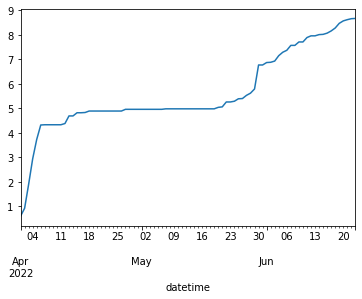

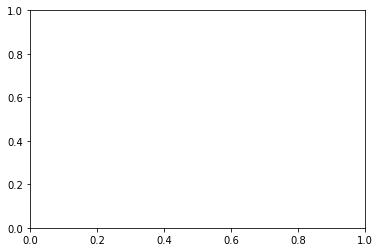

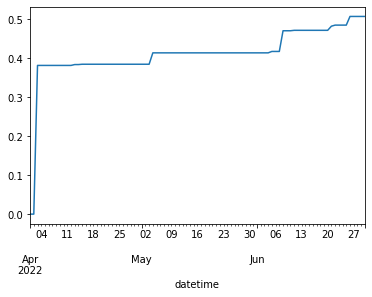

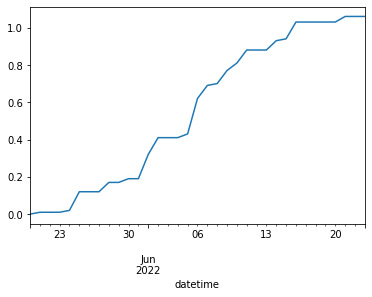

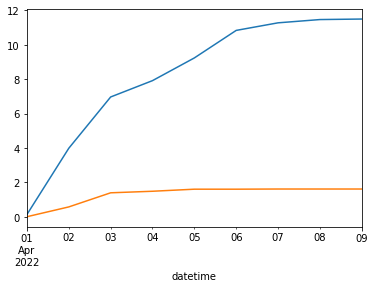

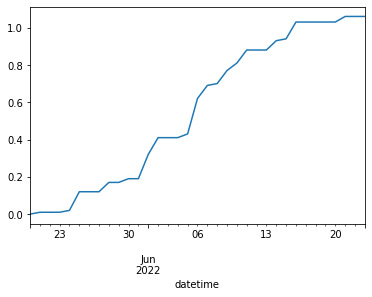

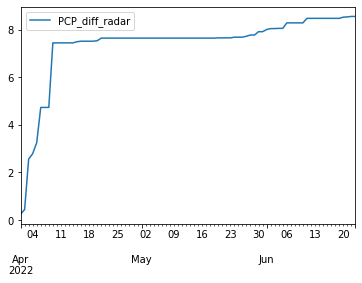

In [82]:
for path in files:
    ds = load_measurements(path)
    plot_pcp(ds)

In [12]:
ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

,T,RH,SLR,WS,WSmax,PCP_diff_radar,Pabs,WD,PCP_acoustic,FOG
datetime,,,,,,,,,,
2022-04-01 00:00:00,NaN,NaN,0.0,0.78,3.9,0.00,943.0,343.3,0.0,-0.3
2022-04-01 00:10:00,NaN,NaN,0.0,0.95,3.5,0.01,943.0,180.0,0.0,-0.8
2022-04-01 00:20:00,NaN,NaN,0.0,1.04,3.8,0.00,943.0,12.3,0.0,-1.3
2022-04-01 00:30:00,NaN,NaN,0.0,1.01,3.3,0.00,943.0,357.4,0.0,-1.7
2022-04-01 00:40:00,NaN,NaN,0.0,1.18,4.3,0.00,942.0,345.2,0.0,0.0
